# Simple Tutorial

## Introduction

### Description

Depth map estimation for regular camera is a well studied topic in computer vision community. Many algorithms have been proposed in recent years, such as learning based mono depth estimation[?] and multiview geometry based depth estimation[?]. However, as these algorithms are based on regular camera model, depth estimation for omnidirectional camera is still a topic to be explored. 

The differences between regular cameras and omnidirectional cameras are shown in the Figure[?]. For a regular camera, the camera model can be simplified to a camera center plus an image plane. As long as the poses of cameras (from SfM or SLAM) and disparitise (from spares matching or dense matching) are estimated correctly, the depth map can be calculated easily. 

In comparison, for omnidirectional images (360 image), the "image plane" is a sphere. As a result, strong distortions are introduced by the projection from real scenes to the image sphere, leading to the failure of general sparse and dense matching algorithms. Since matching algorithms could not function correctly, disparity maps and the depth maps are relativelly difficult to be estimated. Besides, as the register operation introduces
more servere distortions[?], many classical algorithms are not applicable for 360 images. 

To solve the depth estimation problem for 360 images, here a cubic map based method is implemented. Since the main quesion is how to deal with the distortion caused the camera sphere, projecting a 360 image to its 6 tangent planes (6 cubic maps) is one of the most straght-forward way. The connections between 360 image and cubic maps are shown in Figure[?]. 

After cube projection, 360 images are decomposed to cubic maps, which can be treated as regular images. In addition, the camera parameters corresponding to these cubic maps can be easily obtained from original 360 images.  Thus, it is possible to use availabel algorithms to estimate depth map for each of these cubic maps. 

Finally, with estimated cubic depth maps, a inverse projection from cubic maps to 360 images can generate the final 360 depth maps. 

In this project, the above cubic maps based method is implemented. Depth estimation for the cubic maps is based on the [colmap](https://colmap.github.io/), the patch matching stereo GPU part. 

This tutorial includes two parts:
1. a simple introduction of the provided cubemap class; 
2. an example of the wrapper for 360 depthmap estimation.

### Prerequisites

- [Linux](). As the installtion of [pyshtools]() does not work well on Windows, this project is tested on Ubuntu 18.04. 

- [Numpy](), [OpenCV](), [pyshtools](), [interpolation]() and [?]

- To execute the wrapper correctly, you have to install [colmap](https://colmap.github.io/) and GPUs with at least 8GB memory are neccessary.

In [43]:
resolution = 1024

In [44]:
Rs = resolution/4
Rc = Rs/2

In [45]:
angle_sph = np.pi/2/Rs

In [46]:
angle_cube = np.diff(np.arctan(np.arange(0, Rc+1) * 1/Rc))

In [57]:
weight = (angle_cube - angle_sph)
weight[weight < 0] = 0
weight = weight/weight.sum()

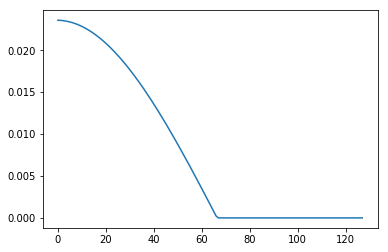

In [58]:
plt.plot(weight)